<a href="https://colab.research.google.com/github/JumperWacky/Jumper/blob/main/mnist_rec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

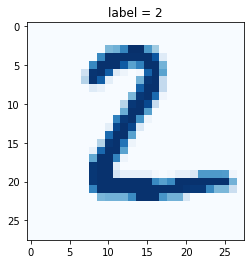

In [14]:
df = pandas.read_csv("/content/mnist_data/mnist_test.csv")
row = 0
data = df.iloc[row]

label = data[0]

img = data[1:].values.reshape(28, 28)
plt.title("label = " + str(label))
plt.imshow(img, interpolation = 'none', cmap = 'Blues')
plt.show()

In [19]:
class Classifier(nn.Module):
  def __init__(self):
    # 初始化Pytorch父类
    super(Classifier).__init__()

    # 定义神经网络层
    self.model = nn.Sequential(
        nn.Linear(784, 200),
        nn.Sigmoid(),
        nn.Linear(200, 10),
        nn.Sigmoid()
    )

    # 创建损失函数
    self.loss_function = nn.MSELoss()

    # 创建优化器
    self.optimizer = torch.optim.SGD(self.parameters(), lr=0.01)

    # 可视化训练，记录训练进展的计数器和列表
    self.counter = 0
    self.progress = []

    pass
  
  def forward(self, inputs):
    return self.model(inputs)

  def train(self, inputs, targets):
    # 计算网络的输出值
    outputs = self.forward(inputs)
    # 计算损失值
    loss = self.loss_function(outputs, targets)

    # 梯度归零，反向传播，更新权重
    self.optimizer.zero_grad()
    loss.backward()
    self.optimizer.step()

    # 每隔10个训练样本增加一次计数器的值，并将损失值添加进列表的末尾

    